## Running the Python Scripts

In [1]:
!git clone https://github.com/Anushka-De/stat359.git
%cd stat359/student/Assignment_3
!ls

fatal: destination path 'stat359' already exists and is not an empty directory.
/content/stat359/student/Assignment_3
acc_vs_epoch.png	   README.md
best_mlp_fasttext.pt	   train_sentiment_bert_classifier.py
confusion_matrix_test.png  train_sentiment_gpt_classifier.py
handout.html		   train_sentiment_gru_classifier.py
handout.ipynb		   train_sentiment_lstm_classifier.py
loss_vs_epoch.png	   train_sentiment_mlp_classifier.py
macro_f1_vs_epoch.png	   train_sentiment_rnn_classifier.py
open_questions.ipynb


In [2]:
!pip -q install "datasets<4.0.0"
!pip install -q numpy pandas gensim torch scikit-learn matplotlib ipywidgets nltk tqdm

In [3]:
print("\n========== Loading Dataset ==========")
from datasets import load_dataset

dataset = load_dataset('financial_phrasebank', 'sentences_50agree', trust_remote_code=True)
print("Dataset loaded. Example:", dataset['train'][:5])


========== Loading Dataset ==========


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Dataset loaded. Example: {'sentence': ['According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .', 'Technopolis plans to develop in stages an area of no less than 100,000 square meters in order to host companies working in computer technologies and telecommunications , the statement said .', 'The international electronic industry company Elcoteq has laid off tens of employees from its Tallinn facility ; contrary to earlier layoffs the company contracted the ranks of its office workers , the daily Postimees reported .', 'With the new production plant the company would increase its capacity to meet the expected increase in demand and would improve the use of raw materials and therefore increase the production profitability .', "According to the company 's updated strategy for the years 2009-2012 , Basware targets a long-term net sales growth in the range of 20 % -40 % with an operating profit margin of 10 % -20 % of n

In [4]:
#Set Seed
import random
random.seed(42)

**Task 1 Implementation**

In [5]:
!python train_sentiment_mlp_classifier.py


========== Loading Dataset ==========
Using device: cpu
Dataset loaded. Example: {'sentence': 'According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .', 'label': 1}

========== Splitting Data ==========
Train: 3501, Val: 618, Test: 727

========== Loading FastText Model ==========
[==================================================] 100.0% 958.5/958.4MB downloaded
FastText loaded.

========== Creating DataLoaders ==========

========== Setting Up Training ==========
Training setup complete.

========== Starting Training Loop ==========

--- Epoch 1/60 ---
Train Loss: 1.0609, Train F1: 0.3929, Train Acc: 0.4367
Val Loss: 1.0505, Val F1: 0.3742, Val Acc: 0.5291
>>> Saved new best model (Val F1: 0.3742) at epoch 1

--- Epoch 2/60 ---
Train Loss: 0.9836, Train F1: 0.4391, Train Acc: 0.5633
Val Loss: 0.9488, Val F1: 0.4732, Val Acc: 0.5372
>>> Saved new best model (Val F1: 0.4732) at epoch 2

--- Epoch 3/60 ---
Train L

**Task 2 Implementation**

In [ ]:
!python train_sentiment_lstm_classifier.py


========== Loading Dataset ==========
Using device: cpu
Dataset loaded. Example: {'sentence': 'According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .', 'label': 1}

========== Splitting Data ==========
Train: 3501, Val: 618, Test: 727

========== Loading FastText Model ==========
FastText loaded.

========== Creating DataLoaders ==========

========== Setting Up Training ==========
Training setup complete.

========== Starting Training Loop ==========

--- Epoch 1/80 ---
Train Loss: 1.0551, Train F1: 0.4152, Train Acc: 0.5390
Val Loss: 1.0387, Val F1: 0.3362, Val Acc: 0.4466
>>> Saved new best model (Val F1: 0.3362) at epoch 1

--- Epoch 2/80 ---
Train Loss: 0.9804, Train F1: 0.4429, Train Acc: 0.5696
Val Loss: 1.0189, Val F1: 0.4447, Val Acc: 0.6230
>>> Saved new best model (Val F1: 0.4447) at epoch 2

--- Epoch 3/80 ---
Train Loss: 0.8938, Train F1: 0.5028, Train Acc: 0.6067
Val Loss: 0.9715, Val F1: 0.4566, Va

**Implementation of Provided Scripts**

In [ ]:
!python train_sentiment_rnn_classifier.py

In [ ]:
!python train_sentiment_gru_classifier.py

In [ ]:
!python train_sentiment_bert_classifier.py

In [ ]:
!python train_sentiment_gpt_classifier.py

In [ ]:
Saving Outputs
!zip -r outputs.zip outputs
from google.colab import files
files.download("outputs.zip")

## Open Ended Reflecion Questions

### 1. Training Dynamics
*Focus on your MLP and LSTM implementations*

Did your models show signs of overfitting or underfitting? What architectural or training changes could address this?
How did using class weights affect training stability and final performance?



**MLP Model**

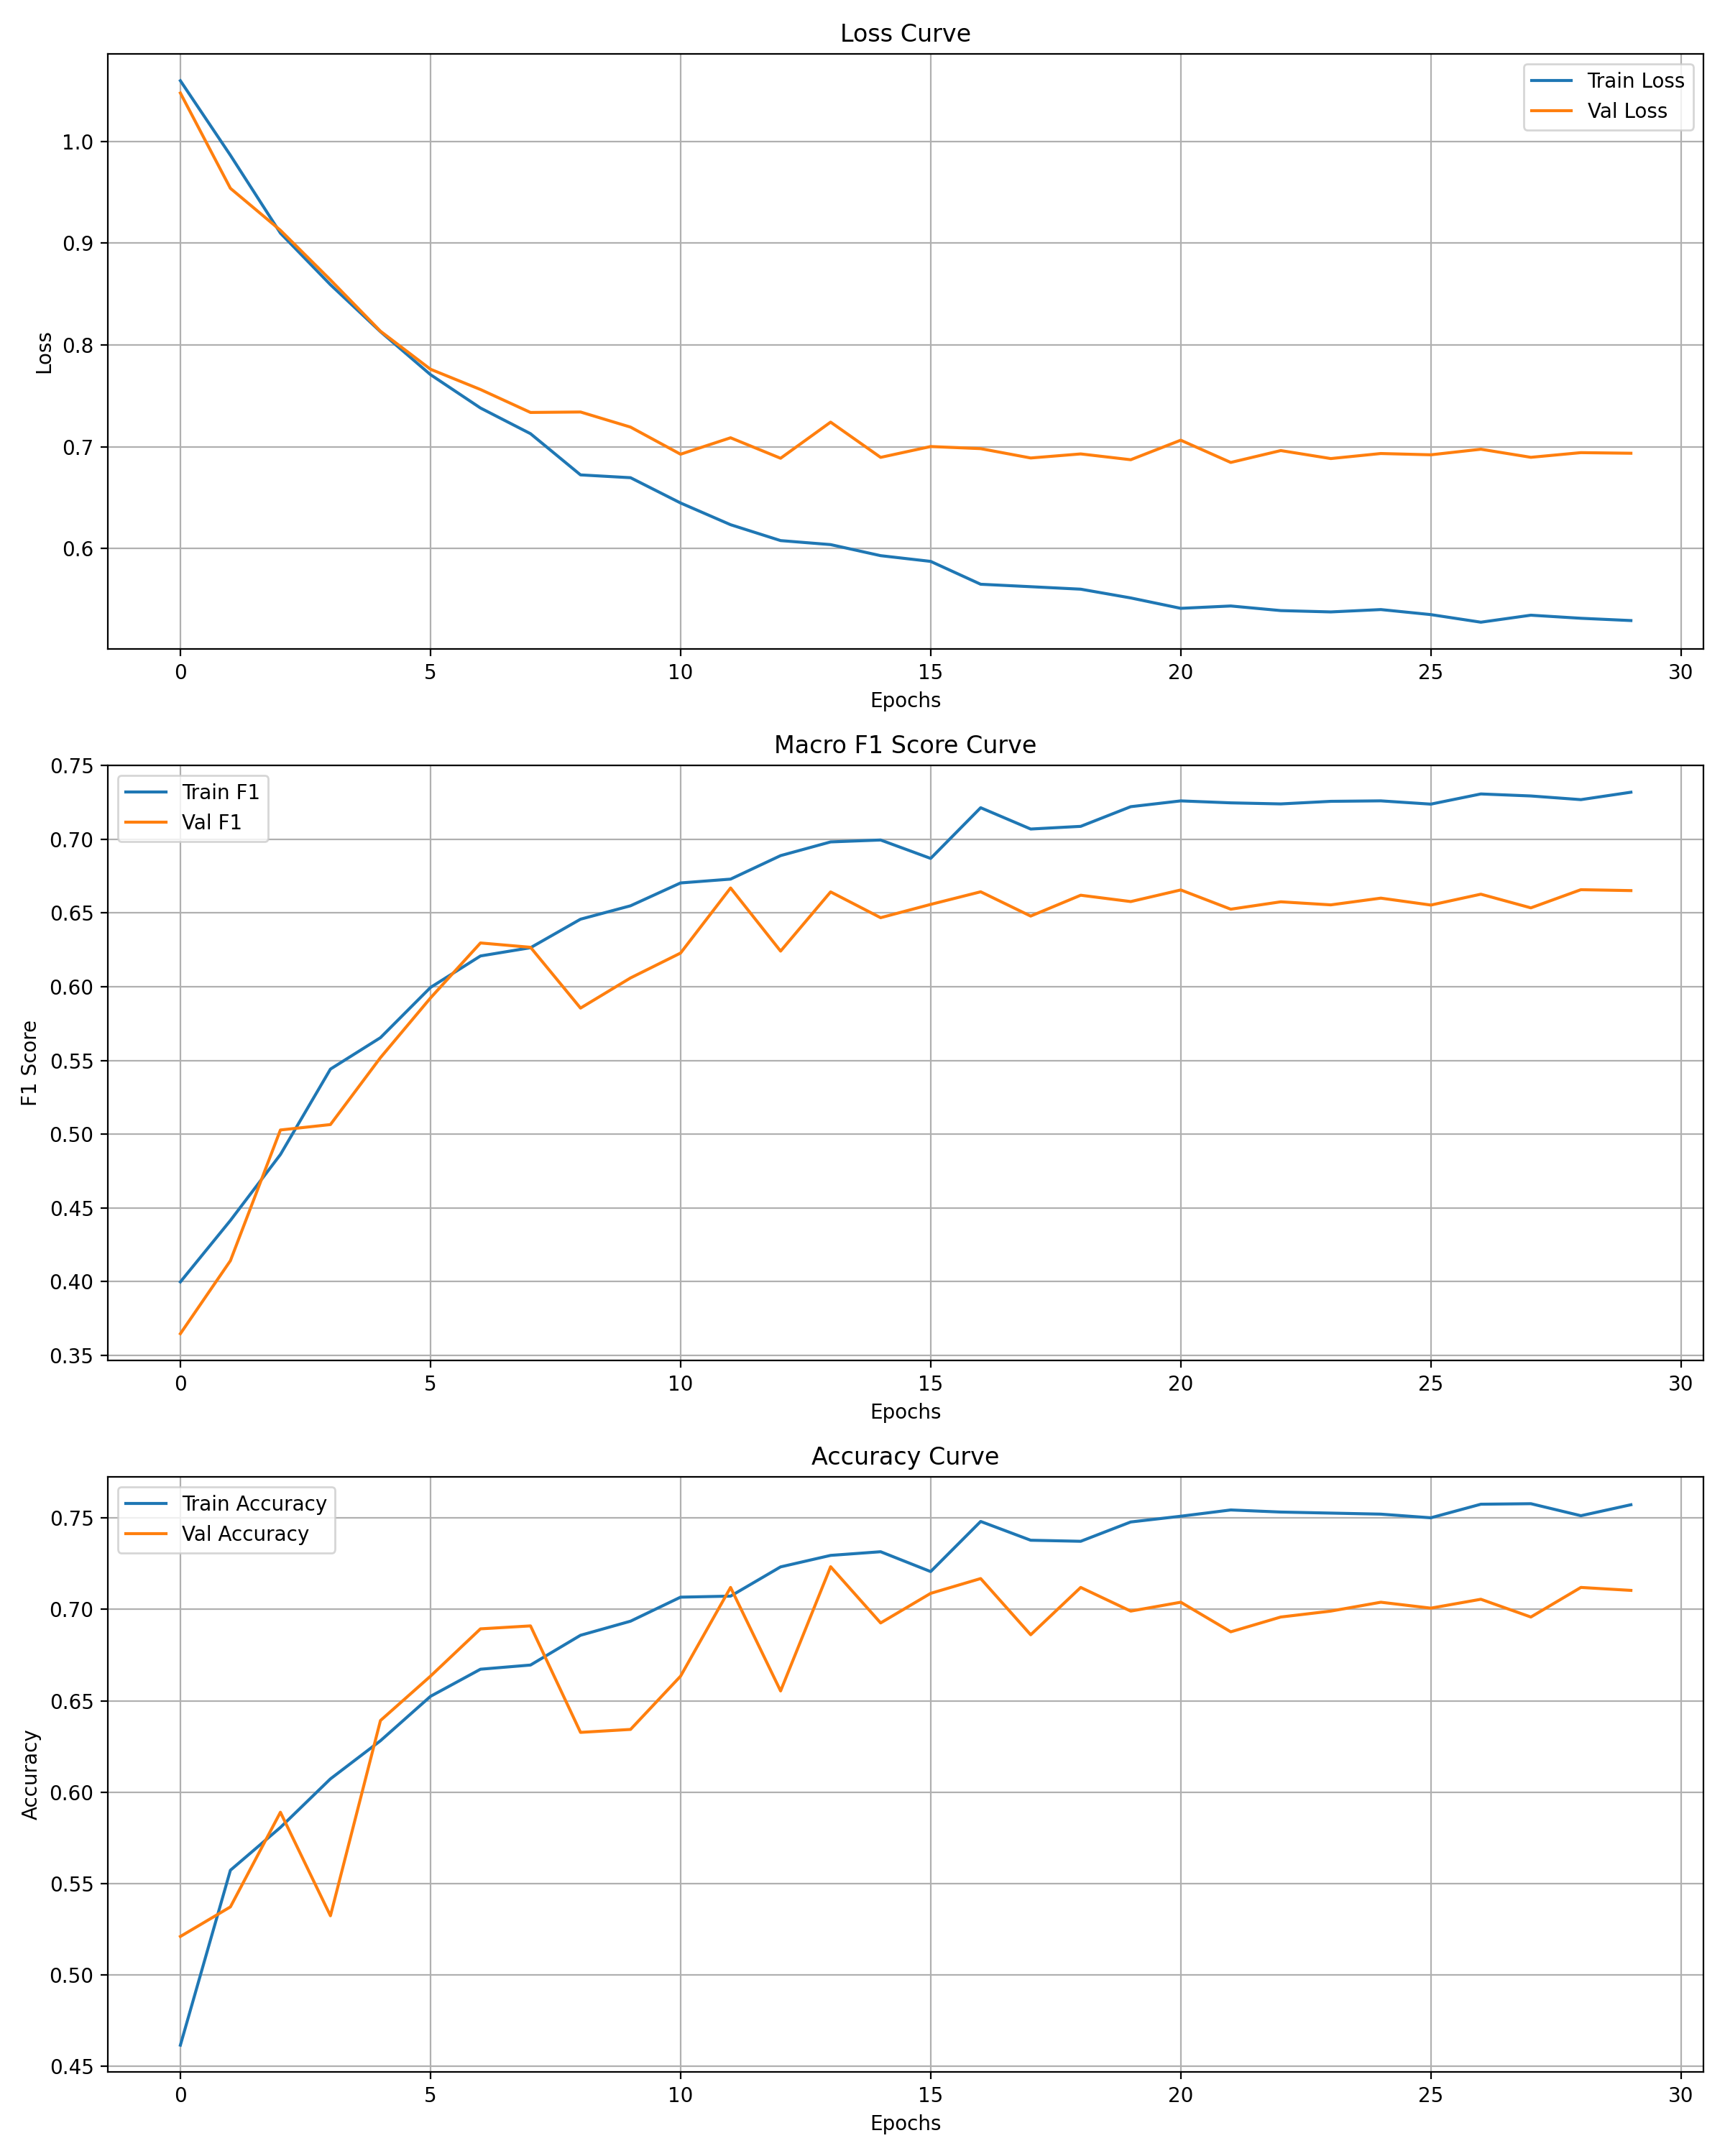

The MLP shows mild overfitting after early epochs:

- In the loss curve, training loss keeps decreasing steadily from ~1.05 to ~0.53, while validation loss plateaus around 0.69–0.70 after epoch ≈10.

- In the macro-F1 curve, validation F1 improves until around epoch 10–12 (≈0.66) and then fluctuates without further gain, while train F1 continues to rise to ≈0.73.

- A similar gap appears in accuracy: training accuracy reaches ~0.76 while validation remains around ~0.70.

This pattern—improving training metrics but stagnant validation metrics—indicates the model begins to fit training-specific noise rather than learning features that generalize.

**Possible remedies for MLP**

- Keep early stopping based on validation macro-F1 (already effective in my run).

- Increase regularization: slightly higher dropout (e.g., 0.3 → 0.4) or stronger weight decay.

- Reduce capacity (smaller hidden layer) if the gap widens.

- A lower learning rate or LR scheduling could reduce late-epoch oscillations.

 **LSTM**
 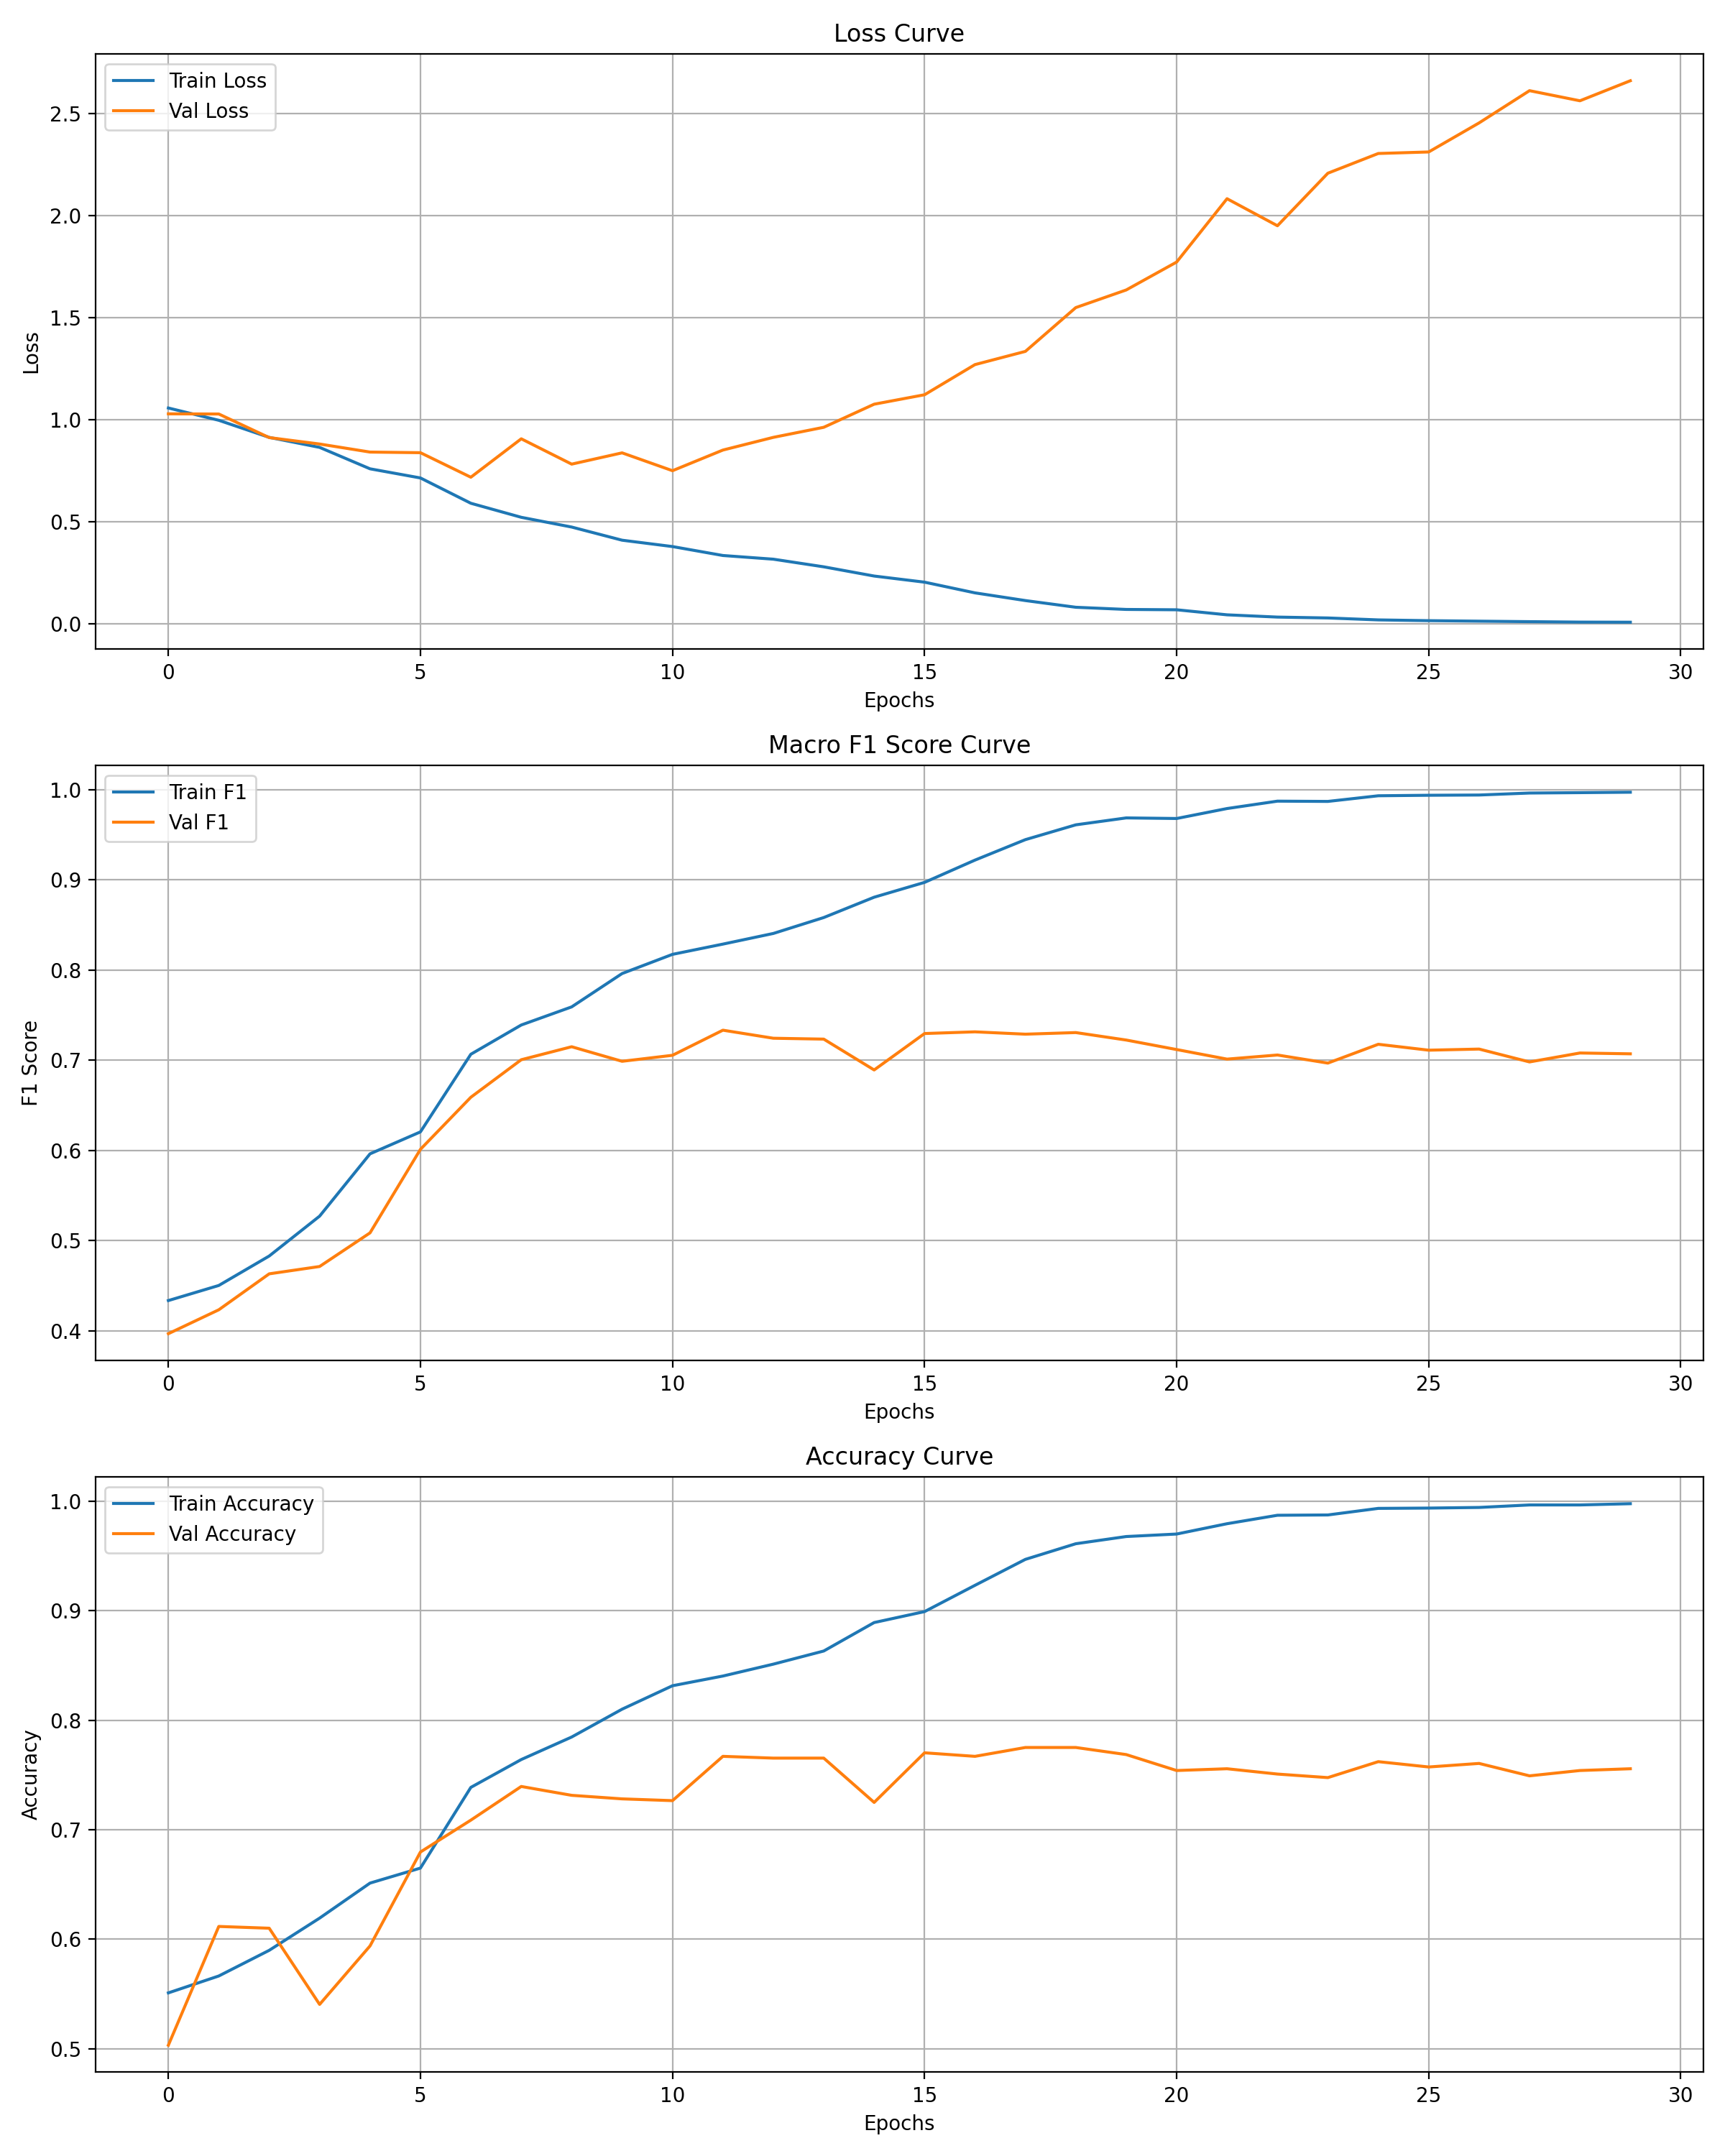

The LSTM shows clearer overfitting than the MLP:

- Training loss drops almost to zero, while validation loss increases sharply after epoch ~10, reaching >2.5.

- Training macro-F1 approaches 1.0, but validation macro-F1 saturates around ~0.72 and does not follow the training improvement.

- Accuracy curves show the same divergence (train → ~1.0 vs val → ~0.75).

This is a classic sign that the LSTM has high capacity relative to dataset size and memorizes the training set.

**Possible remedies for LSTM**

- Stronger regularization: increase dropout in the classifier head or use a smaller hidden size.

- Use 2-layer LSTM with internal dropout (dropout only applies when num_layers > 1).

- Reduce hidden dimension (e.g., 256 → 128).

- Earlier stopping or lower learning rate to avoid sharp validation degradation.

**Effect of Class Weights**

Using nn.CrossEntropyLoss(weight=…) had a noticeable impact:

- Macro-F1 improves more than accuracy in both models.

 In the MLP curves, validation accuracy stabilizes near ~0.70, but macro-F1 continues to rise to ~0.66, showing better treatment of minority classes.

- Without class weights, the model would be biased toward the neutral majority class, giving deceptively high accuracy but poor macro-F1.

**Training stability**

Class weighting makes early training slightly noisier—visible as oscillations in validation F1—because errors on minority classes are amplified.

However, it leads to better balanced decision boundaries and higher final macro-F1, which is the assignment metric.

The contrast between: relatively flat accuracy curves, and
more informative macro-F1 curves demonstrates why class weighting is important for this imbalanced dataset.

### 2. Model Performance and Error Analysis
*Focus on your MLP and LSTM implementations*

Which of your two models generalized better to the test set? Provide evidence from your metrics.
Which sentiment class was most frequently misclassified? Propose reasons for this pattern.

**Confusion Matrix for MLP**
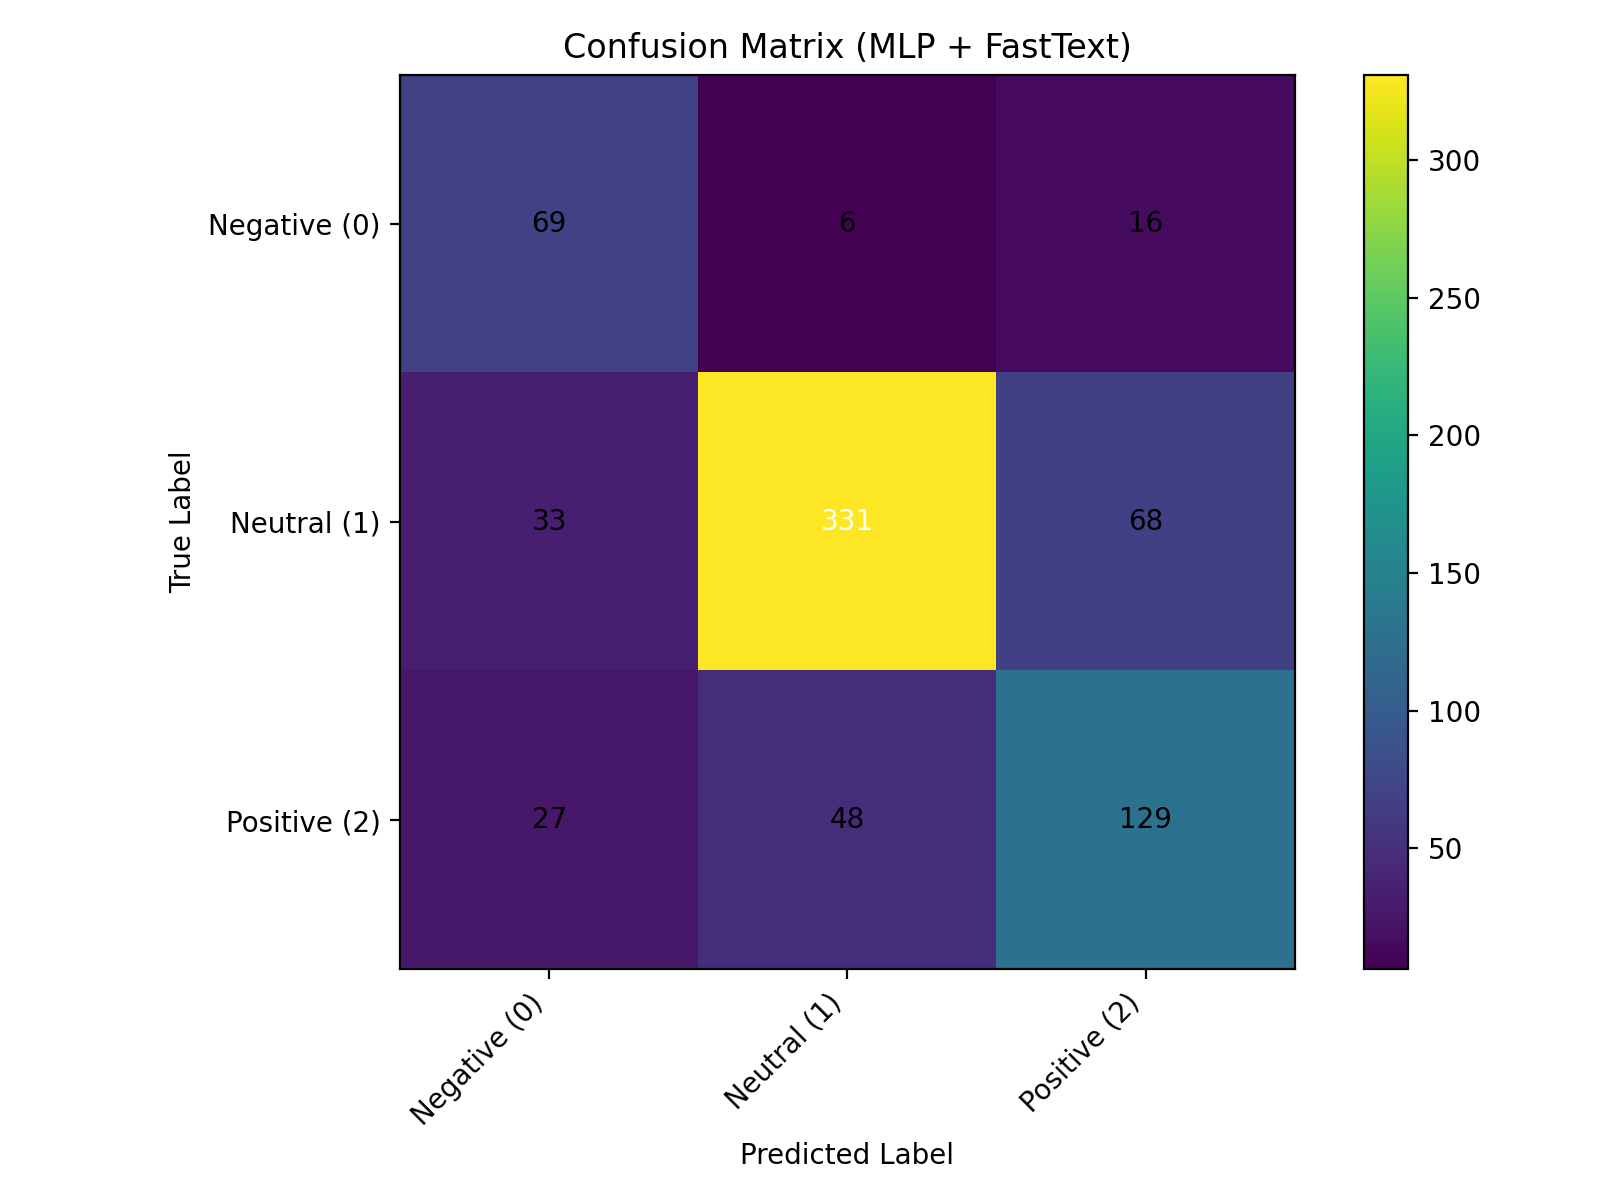

**Confusion Matrix for LSTM**

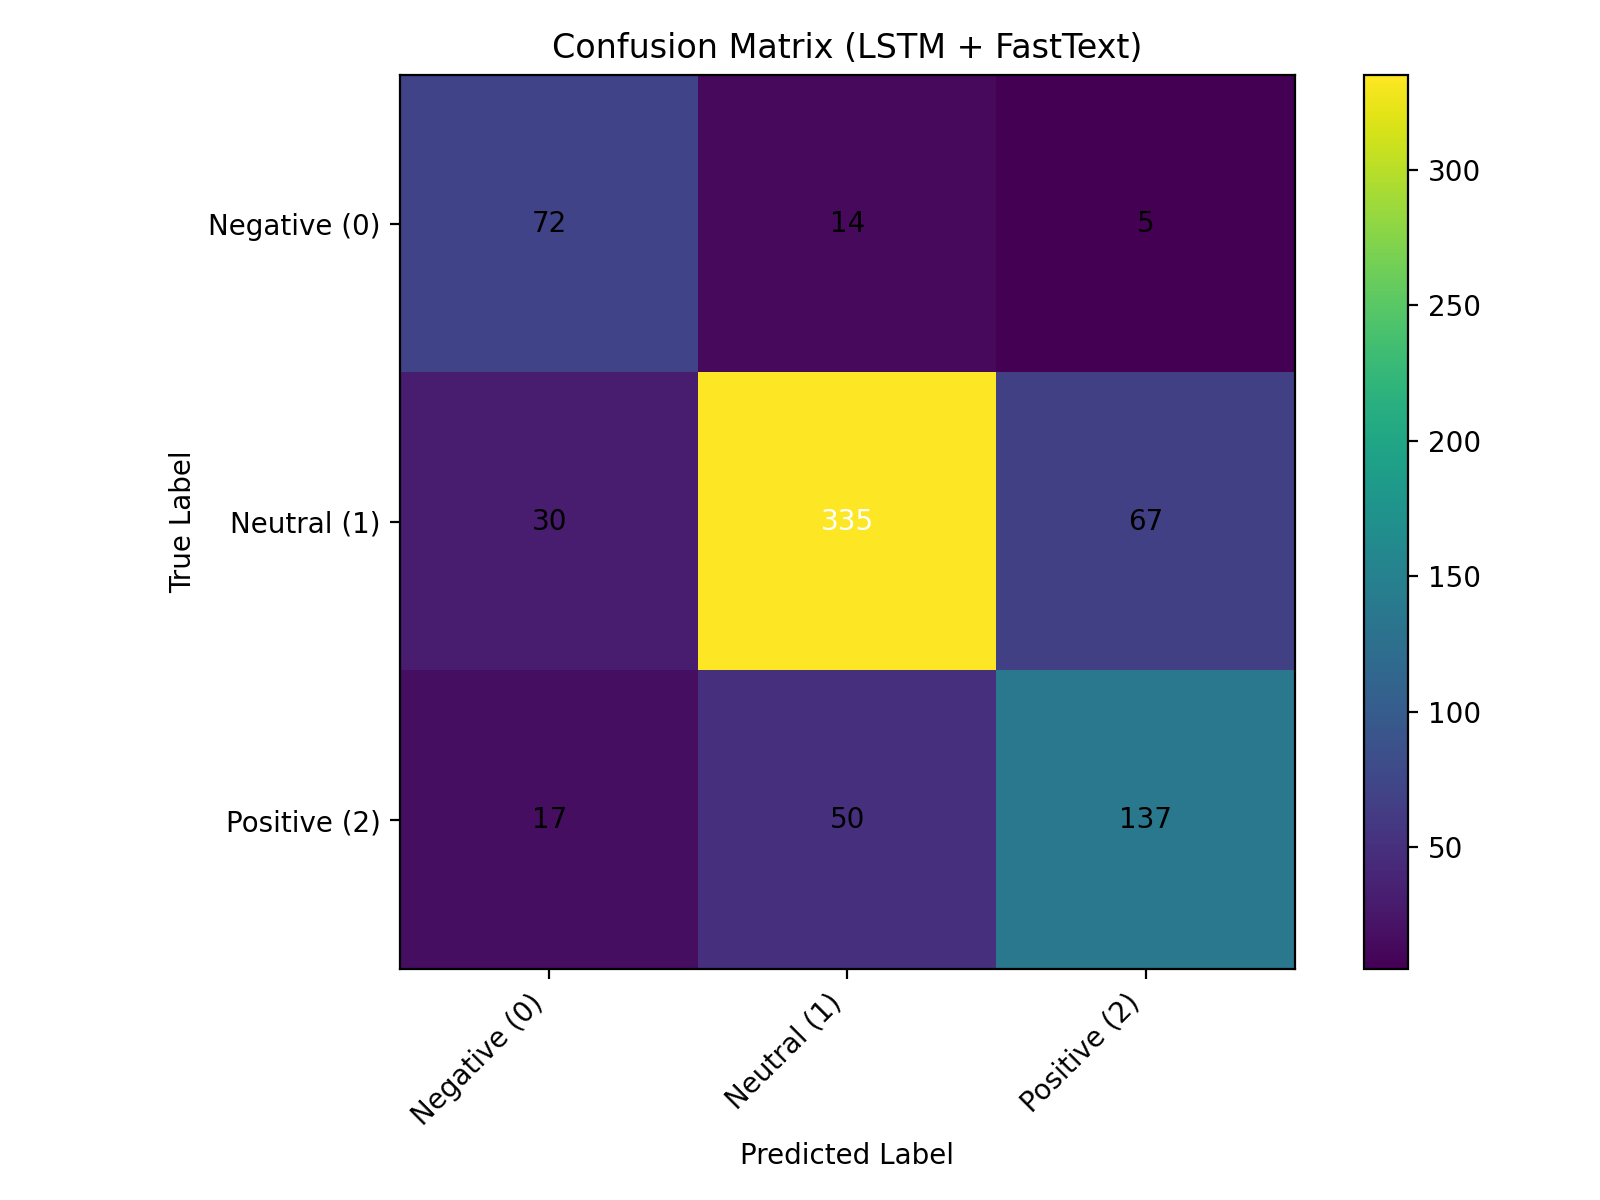

The **LSTM model generalized better** than the MLP on the held-out test data.

Evidence from metrics and confusion matrices

- The LSTM achieved a higher test macro-F1 and accuracy than the MLP (≈0.71–0.72 macro-F1 vs ≈0.66 for the MLP).

- In the confusion matrices:

   The LSTM correctly classified more Positive and Negative instances

   - Positive correct: 137 vs 129 (MLP)

   - Negative correct: 72 vs 69 (MLP)

- The number of severe mistakes (e.g., Negative→Positive) is smaller in the LSTM (5) than in the MLP (16).

This indicates that modeling word order and sequential context helps: the LSTM can capture negation and local phrasing (“profits fell despite higher sales”) that the mean-pooled MLP cannot.

The N**eutral class was most frequently misclassified** in both models.

Evidence from the matrices

- For the LSTM:

  - True Neutral: 432 samples

  - Misclassified as Positive: 67

  - Misclassified as Negative: 30,
  leading to 97 errors involving Neutral

- For the MLP:

  - True Neutral misclassified:
      - 68 : Positive
      - 33 : Negative
      - 101 errors involving Neutral

These are far larger than errors within the Positive or Negative rows.

**Reasons for this pattern**

1. **Inherent ambiguity of “Neutral” financial language**

Many sentences contain mixed signals:
“Revenue increased, but margins remained weak.”
Such statements include both positive and negative cues and are difficult to assign a single polarity.

2. **Dataset imbalance**

Neutral is the majority class, so its decision boundary overlaps heavily with the other two. Even with class-weighted loss, borderline examples tend to be pulled toward Positive or Negative.

3. **Information loss in representations**

 - The MLP ignores word order entirely, increasing Neutral confusion.

 - The LSTM reduces but does not eliminate this issue due to truncation to 32 tokens and limited context.

4. **Annotation subjectivity**

The “50agree” split contains sentences where annotators only partially agreed, making Neutral labels noisier than the clearly positive/negative ones.

### 3. Cross Model Comparison
*Compare all six models: MLP, RNN, LSTM, GRU, BERT, GPT*


**Learning Curves across the Four provided Models**

**BERT**

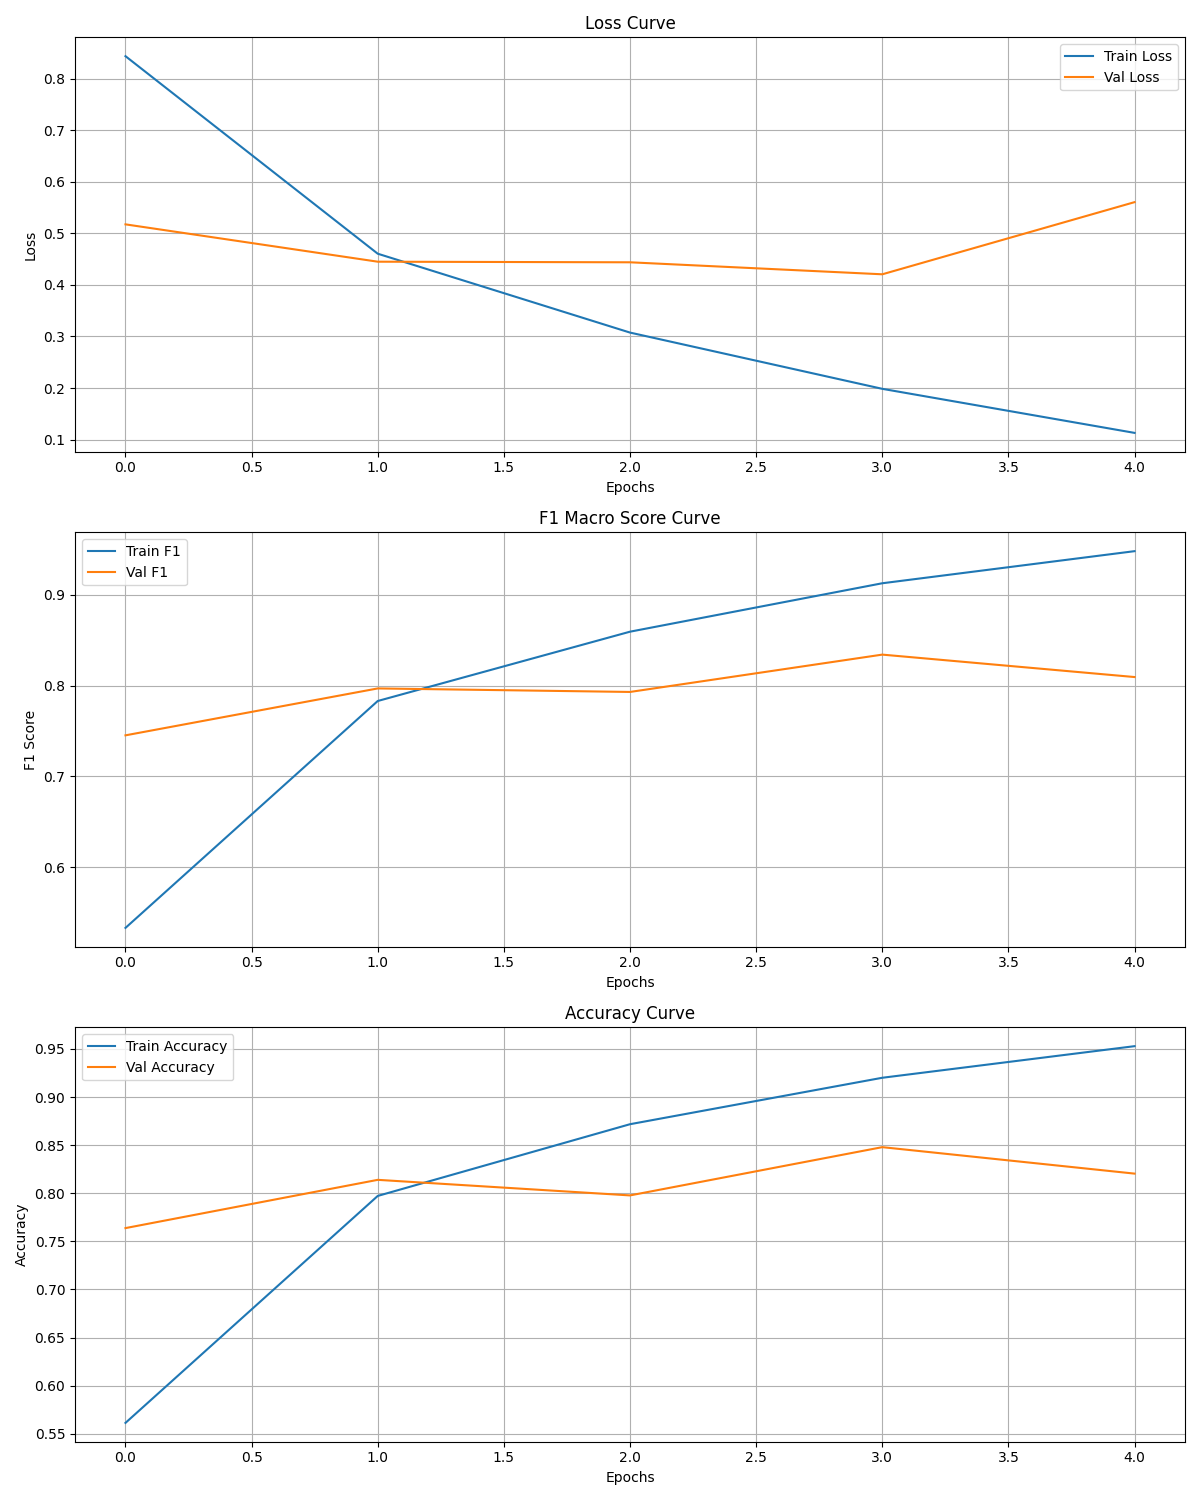

**GPT**
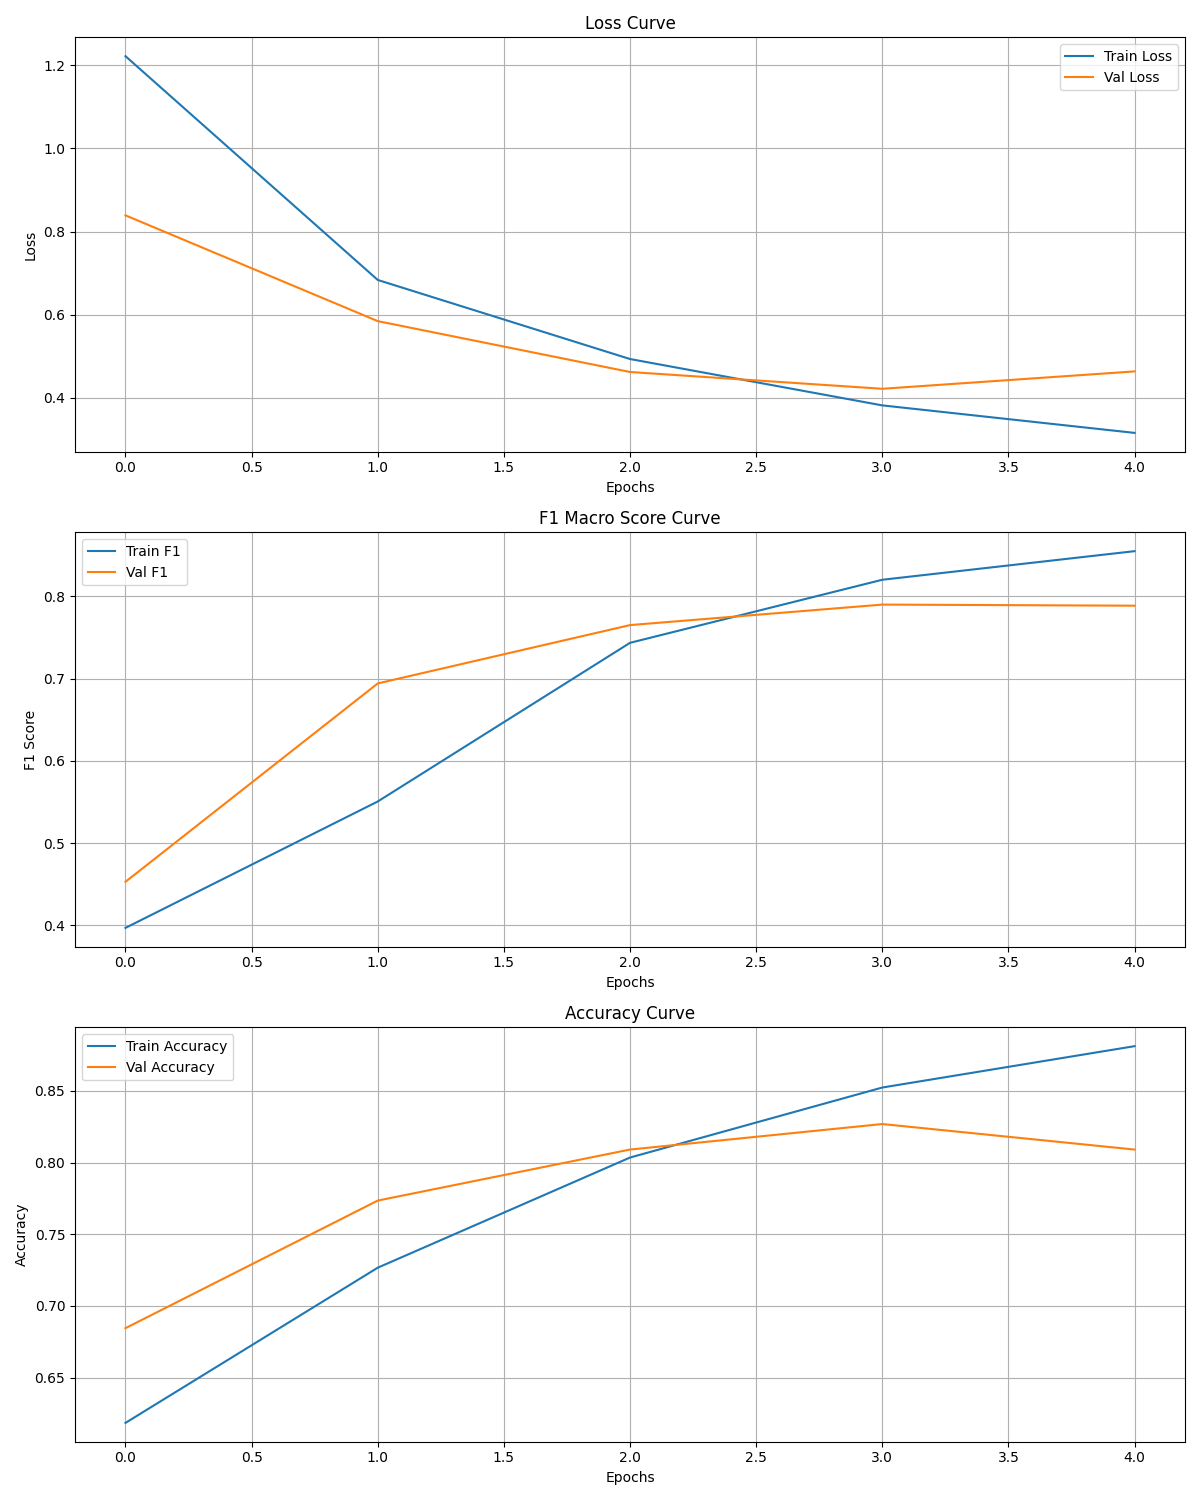

**GRU**
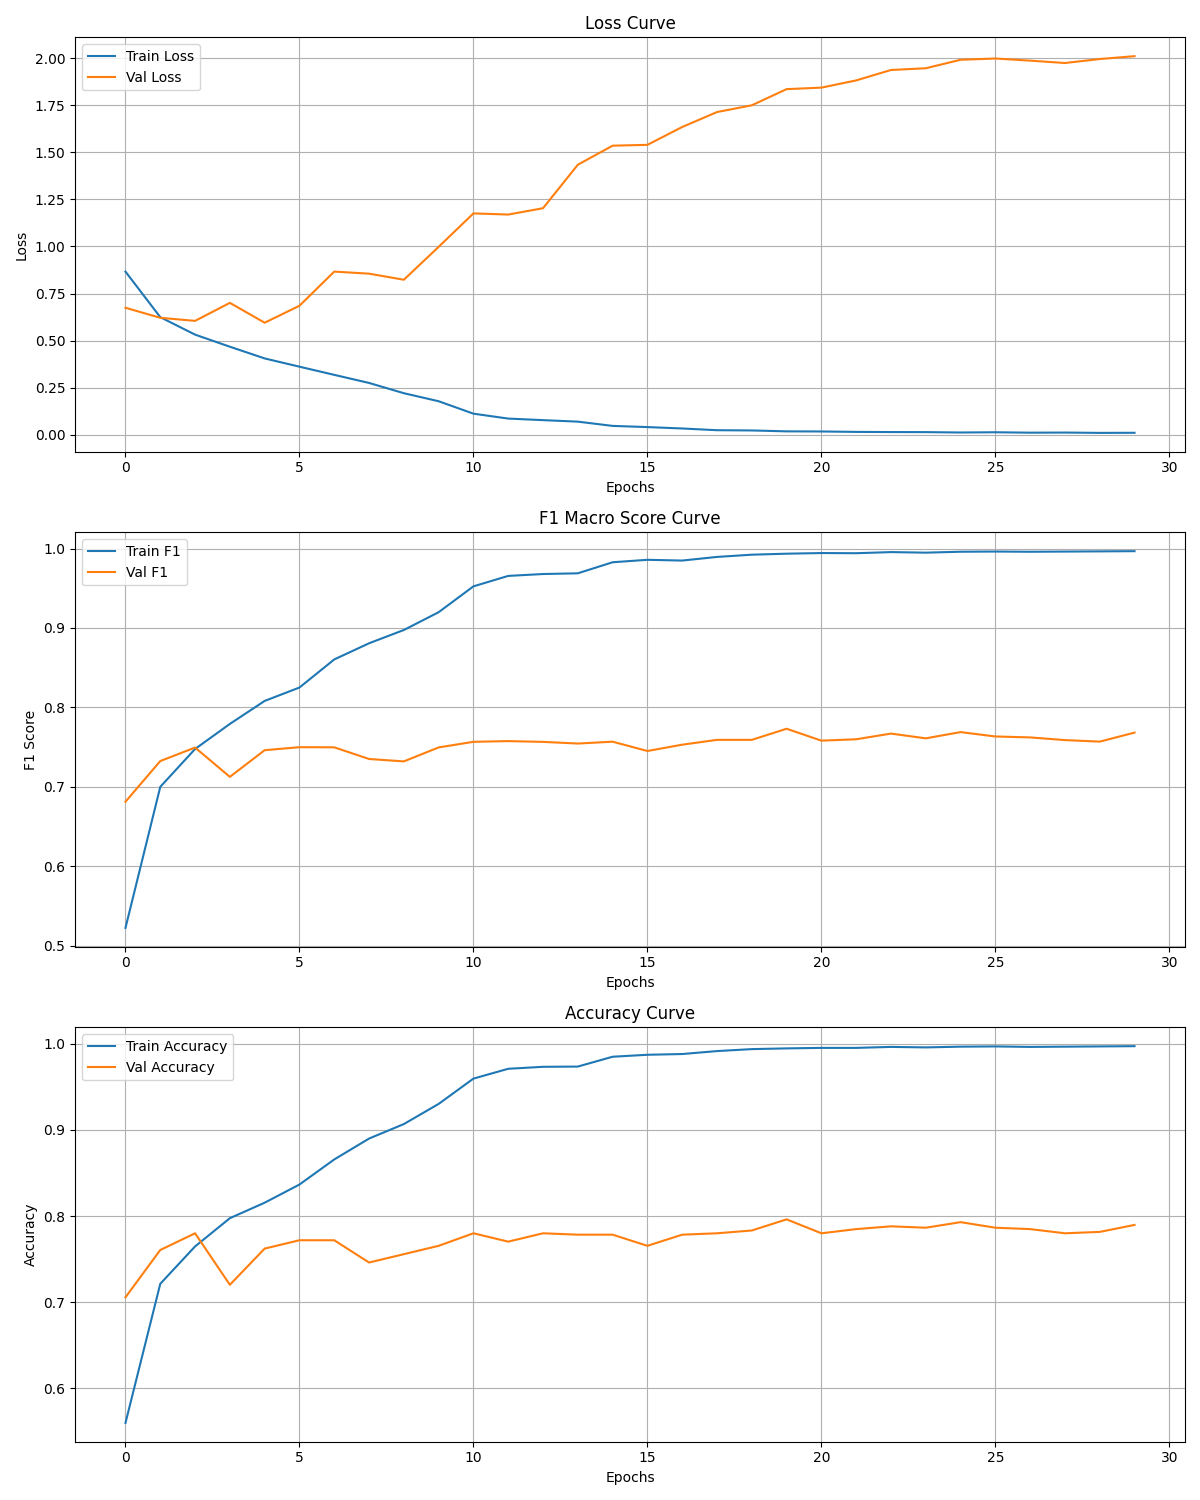

**RNN**
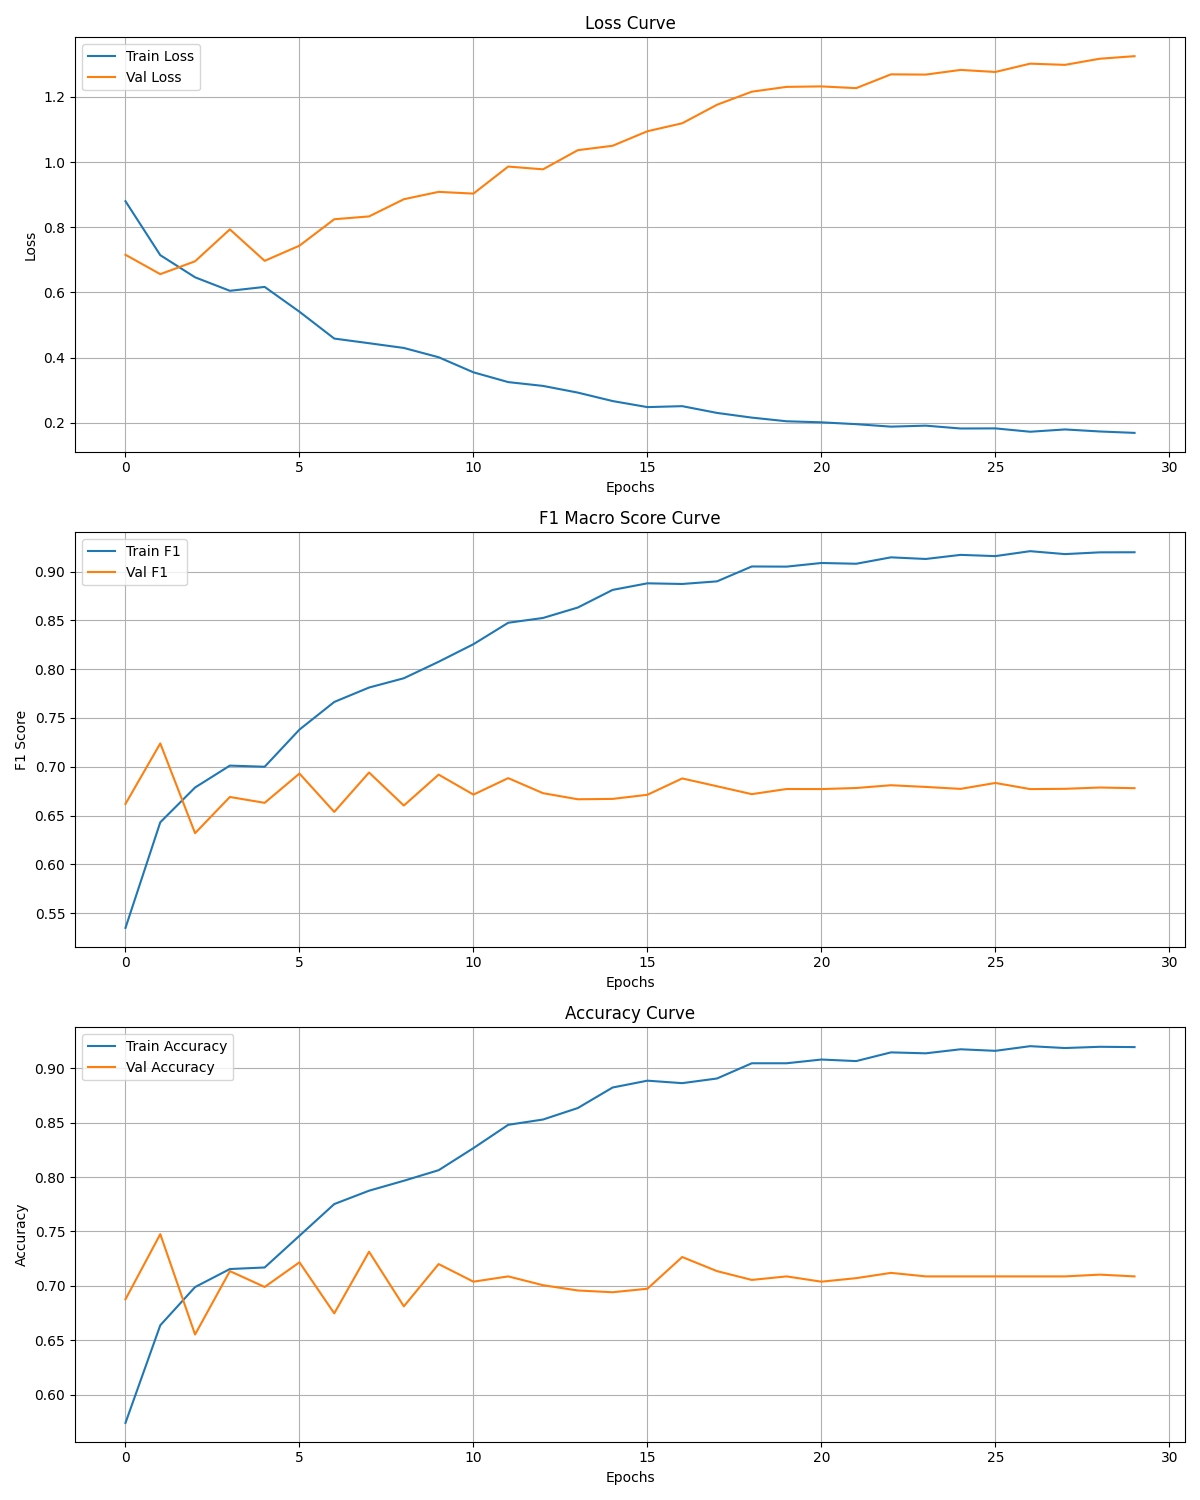

- How did mean-pooled FastText embeddings limit the MLP compared to sequence-based models?

The MLP used mean-pooled FastText embeddings, which collapses a sentence into a single 300-dimensional vector before classification. This representation ignores:

- word order (e.g., “profit fell sharply” vs. “sharply fell profit”),

- negation scope (“not profitable”),

- local interactions between sentiment-bearing tokens.

As a result, the MLP curves showed early saturation: training loss decreased steadily, but validation F1 plateaued around ~0.66 with a persistent gap to training performance. This indicates that the model could only exploit lexical polarity (individual positive/negative words) and lacked the capacity to model compositional meaning.

In contrast, the sequence-based models (RNN/GRU/LSTM) processed token embeddings step-by-step and retained contextual information through hidden states. Their learning curves show:

- faster initial gains in validation F1,

- higher and more stable plateaus (~0.70+),

- better alignment between train and validation metrics.

This demonstrates that even simple recurrent structure provides meaningful advantages over bag-of-words pooling.

**Comparison with pretrained LLMs (BERT & GPT)**

The BERT and GPT curves show a markedly different pattern:

- Rapid improvement within few epochs,

- higher validation F1 (~0.75–0.80),

- much smaller train–validation gap than classical models.

Because these models start with contextual pretrained representations, they already encode:

- syntactic relations,

- negation handling,

- domain-agnostic sentiment cues.

Fine-tuning only needs to adapt this knowledge to financial language, which explains the superior generalization compared to FastText-based approaches.

## AI Use Disclosure (Required)

If you used any AI-enabled tools (e.g., ChatGPT, GitHub Copilot, Claude, or other LLM assistants) while working on this assignment, you must disclose that use here. The goal is transparency-not punishment.

In your disclosure, briefly include:
- **Tool(s) used:** (name + version if known)
- **How you used them:** (e.g., concept explanation, debugging, drafting code, rewriting text)
- **What you verified yourself:** (e.g., reran the notebook, checked outputs/plots, checked shapes, read documentation)
- **What you did *not* use AI for (if applicable):** (optional)

You are responsible for the correctness of your submission, even if AI suggested code or explanations.

#### <font color="red">Write your disclosure here.</font>
